In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.style.use('bmh')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/appl-stock/AAPL.csv


In [2]:
AAPL=pd.read_csv('/kaggle/input/appl-stock/AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200
1,2019-07-15,204.089996,205.869995,204.000000,205.210007,202.789810,16947400
2,2019-07-16,204.589996,206.110001,203.500000,204.500000,202.088181,16866800
3,2019-07-17,204.050003,205.089996,203.270004,203.350006,200.951736,14107500
4,2019-07-18,204.000000,205.880005,203.699997,205.660004,203.234497,18582200
...,...,...,...,...,...,...,...
247,2020-07-06,370.000000,375.779999,369.869995,373.850006,373.850006,29663900
248,2020-07-07,375.410004,378.619995,372.230011,372.690002,372.690002,28106100
249,2020-07-08,376.720001,381.500000,376.359985,381.369995,381.369995,29273000
250,2020-07-09,385.049988,385.269989,378.690002,383.010010,383.010010,31410700


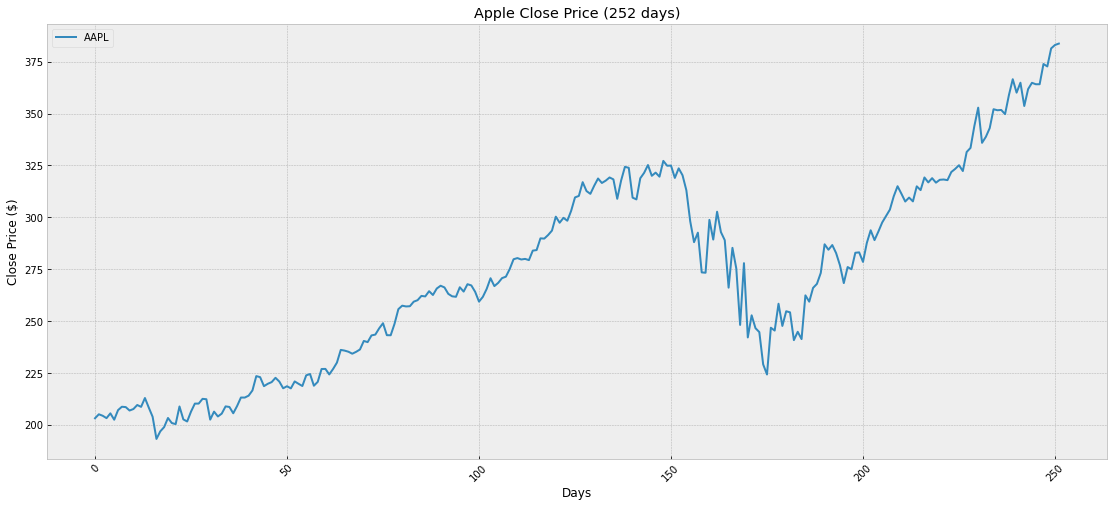

In [3]:
plt.figure(figsize=(19,8))
plt.plot(AAPL['Close'],label='AAPL',linewidth=2)
plt.xticks(rotation=45)
plt.title('Apple Close Price (252 days)')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [7]:
df=AAPL[['Close']]
df.head()

,Close
0,203.300003
1,205.210007
2,204.500000
3,203.350006
4,205.660004


In [11]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Prediction
0,203.300003,206.500000
1,205.210007,210.350006
2,204.500000,210.360001
3,203.350006,212.639999
4,205.660004,212.460007


In [9]:
df.tail()

,Close,Prediction
247,373.850006,NaN
248,372.690002,NaN
249,381.369995,NaN
250,383.010010,NaN
251,383.679993,NaN


In [12]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
X

array([[203.300003],
       [205.210007],
       [204.5     ],
       [203.350006],
       [205.660004],
       [202.589996],
       [207.220001],
       [208.839996],
       [208.669998],
       [207.020004],
       [207.740005],
       [209.679993],
       [208.779999],
       [213.039993],
       [208.429993],
       [204.020004],
       [193.339996],
       [197.      ],
       [199.039993],
       [203.429993],
       [200.990005],
       [200.479996],
       [208.970001],
       [202.75    ],
       [201.740005],
       [206.5     ],
       [210.350006],
       [210.360001],
       [212.639999],
       [212.460007],
       [202.639999],
       [206.490005],
       [204.160004],
       [205.529999],
       [209.009995],
       [208.740005],
       [205.699997],
       [209.190002],
       [213.279999],
       [213.259995],
       [214.169998],
       [216.699997],
       [223.589996],
       [223.089996],
       [218.75    ],
       [219.899994],
       [220.699997],
       [222.7

In [13]:
y=np.array(df['Prediction'])[:-future_days]
y

array([206.5     , 210.350006, 210.360001, 212.639999, 212.460007,
       202.639999, 206.490005, 204.160004, 205.529999, 209.009995,
       208.740005, 205.699997, 209.190002, 213.279999, 213.259995,
       214.169998, 216.699997, 223.589996, 223.089996, 218.75    ,
       219.899994, 220.699997, 222.770004, 220.960007, 217.729996,
       218.720001, 217.679993, 221.029999, 219.889999, 218.820007,
       223.970001, 224.589996, 218.960007, 220.820007, 227.009995,
       227.059998, 224.399994, 227.029999, 230.089996, 236.210007,
       235.869995, 235.320007, 234.369995, 235.279999, 236.410004,
       240.509995, 239.960007, 243.179993, 243.580002, 246.580002,
       249.050003, 243.289993, 243.259995, 248.759995, 255.820007,
       257.5     , 257.130005, 257.23999 , 259.429993, 260.140015,
       262.200012, 261.959991, 264.470001, 262.640015, 265.76001 ,
       267.100006, 266.290009, 263.190002, 262.01001 , 261.779999,
       266.369995, 264.290009, 267.839996, 267.25    , 264.160

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [15]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [16]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[293.799988],
       [289.070007],
       [293.160004],
       [297.559998],
       [300.630005],
       [303.73999 ],
       [310.130005],
       [315.01001 ],
       [311.410004],
       [307.649994],
       [309.540009],
       [307.709991],
       [314.959991],
       [313.140015],
       [319.230011],
       [316.850006],
       [318.890015],
       [316.730011],
       [318.109985],
       [318.25    ],
       [317.940002],
       [321.850006],
       [323.339996],
       [325.119995],
       [322.320007]])

In [17]:
tree_prediction=tree.predict(x_future)
tree_prediction

array([331.5      , 333.459991 , 343.98999  , 352.839996 , 320.029999 ,
       338.799988 , 342.98999  , 352.079987 , 351.589996 , 351.730011 ,
       349.720001 , 358.869995 , 366.529999 , 360.059998 , 319.0999905,
       353.630005 , 361.779999 , 364.799988 , 364.109985 , 364.109985 ,
       364.109985 , 372.690002 , 289.029999 , 383.01001  , 372.690002 ])

In [18]:
lr_prediction=lr.predict(x_future)
lr_prediction

array([306.90238074, 302.94607185, 306.36707745, 310.04737455,
       312.61522757, 315.21651948, 320.56133442, 324.64312823,
       321.63196693, 318.48697312, 320.06784271, 318.53715654,
       324.60129072, 323.07900401, 328.17287337, 326.18216032,
       327.88848974, 326.08179262, 327.23604745, 327.35316052,
       327.09386818, 330.36432182, 331.61059758, 333.09944624,
       330.75744583])

In [20]:
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
valid

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Prediction,Predictions
227,331.500000,NaN,331.500000
228,333.459991,NaN,333.459991
229,343.989990,NaN,343.989990
230,352.839996,NaN,352.839996
231,335.899994,NaN,320.029999
232,338.799988,NaN,338.799988
233,342.989990,NaN,342.989990
234,352.079987,NaN,352.079987
235,351.589996,NaN,351.589996
236,351.730011,NaN,351.730011


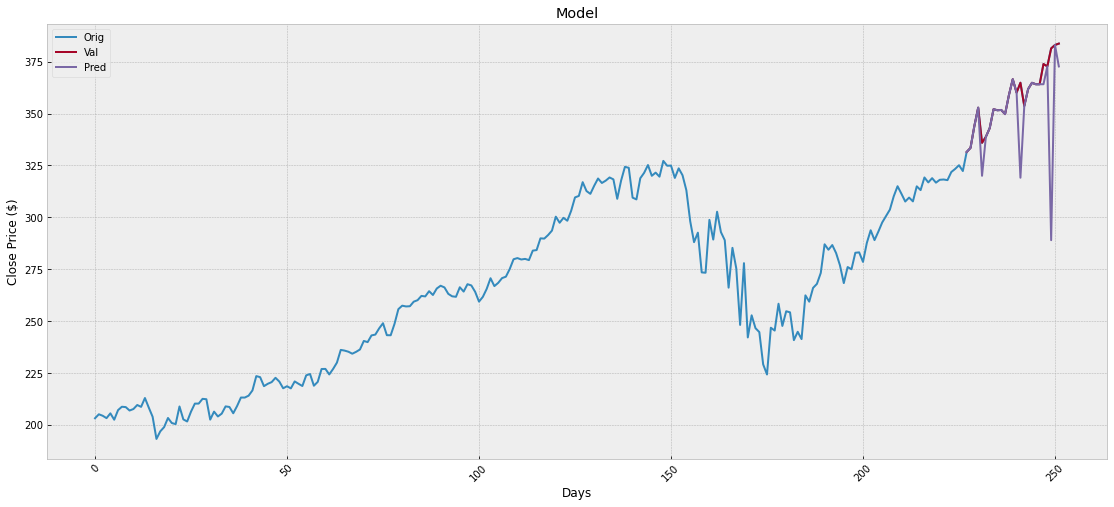

In [21]:
plt.figure(figsize=(19,8))
plt.plot(df['Close'],linewidth=2)
plt.plot(valid[['Close','Predictions']],linewidth=2)
plt.xticks(rotation=45)
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend(['Orig','Val','Pred'],loc='upper left')
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


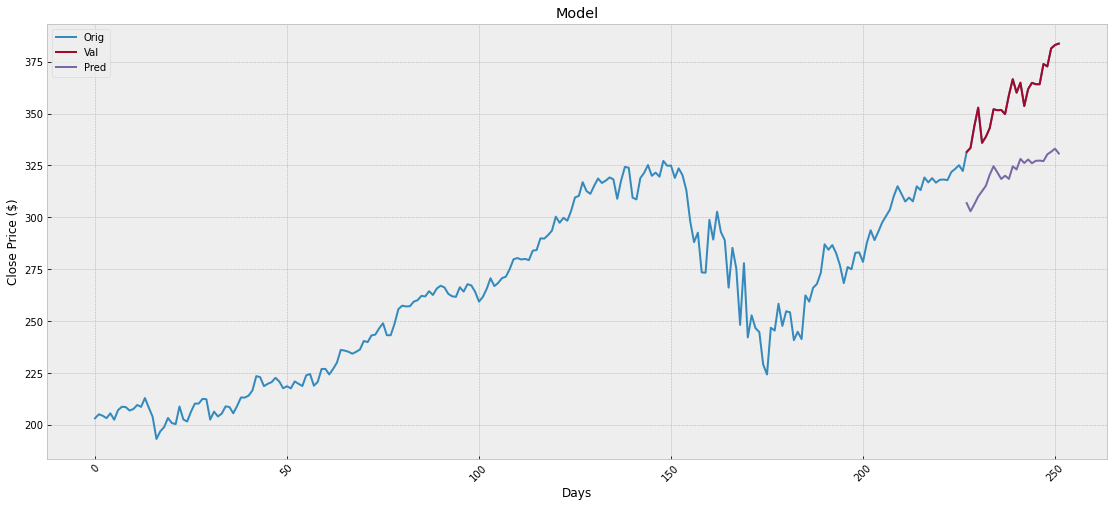

In [22]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions

plt.figure(figsize=(19,8))
plt.plot(df['Close'],linewidth=2)
plt.plot(valid[['Close','Predictions']],linewidth=2)
plt.xticks(rotation=45)
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.legend(['Orig','Val','Pred'],loc='upper left')
plt.show()
